<a href="https://colab.research.google.com/github/vibhorjoshi/-CHECK/blob/main/cotton_plant_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cotton disease predciton app and get cure AI app

In [ ]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


In [ ]:
train_data_path = "/content/drive/MyDrive/Important Documents/train"
validation_data_path = "/content/drive/MyDrive/Important Documents/val"


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
## this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')


Found 324 images belonging to 4 classes.


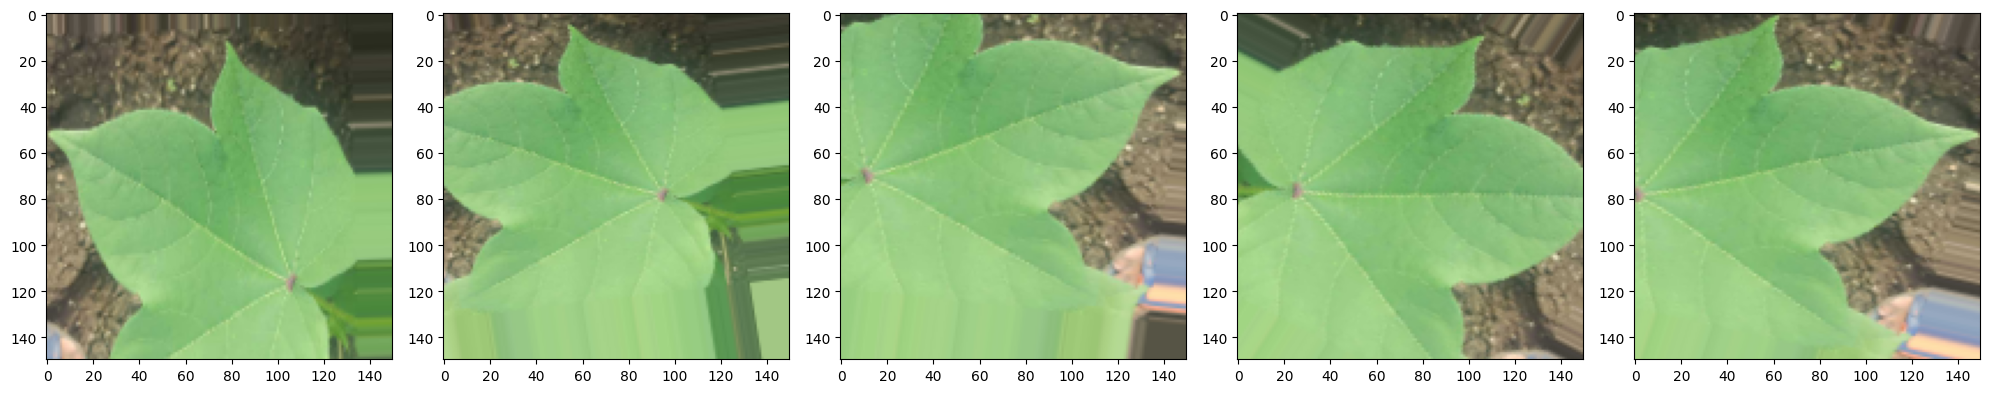

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
model_path = '/content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/v3_red_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [ ]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train cnn model
history = cnn_model.fit(training_data,
                          epochs=500,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

history.history

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 1.2024 - accuracy: 0.4680 
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/v3_red_cott_dis.h5
61/61 [==============================] - 1654s 27s/step - loss: 1.2024 - accuracy: 0.4680 - val_loss: 1.1912 - val_accuracy: 0.5000
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 1.0172 - accuracy: 0.5654
Epoch 2: val_accuracy improved from 0.50000 to 0.60802, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/v3_red_cott_dis.h5
61/61 [==============================] - 20s 334ms/step - loss: 1.0172 - accuracy: 0.5654 - val_loss: 0.9044 - val_accuracy: 0.6080
Epoch 3/500
61/61 [==============================] - ETA: 0s - loss: 0.9090 - accuracy: 0.6274
Epoch 3: val_accuracy did not improve from 0.60802
61/61 [==============================] - 22s 353